In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import datetime as dt 
from matplotlib import dates as mdates
import matplotlib.ticker as ticker

In [2]:
## load data
path = '/Users/nicole/Documents/ARP/code/FCAdata'

files = os.listdir(path)

In [3]:
to_concat = [] 

for file in files:
    if file.endswith('_1.csv') and not file.startswith('ev'):
        to_concat.append(file)

to_concat.append('ev_.csv')   


In [4]:
data_ = []

for file in to_concat:
    #read file
    data = pd.read_csv(f'/Users/nicole/Documents/ARP/code/FCAdata/{str(file)}', lineterminator='\n')

    data_.append(data)

df = pd.concat(data_, ignore_index=True)

In [5]:
df.loc[df.brand.isnull(), 'brand'] = 'ev'

In [6]:
df.loc[df.brand == 'hondae','brand'] = 'honda'

In [7]:
df.brand.value_counts()

ev         819408
renault     29650
honda       20885
mini        11123
fiat         5819
smart        3817
seat          268
Name: brand, dtype: int64

In [8]:
df['date'] = pd.to_datetime(df['date'])

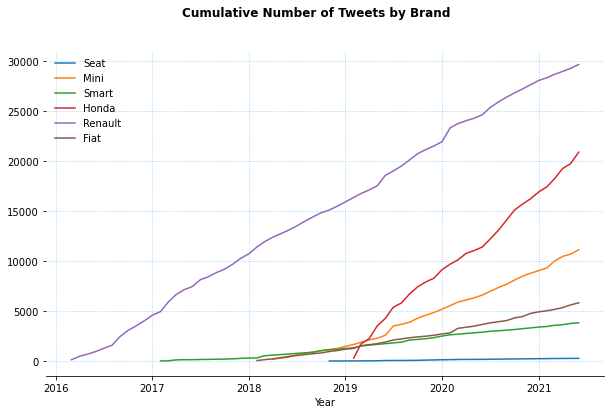

In [9]:
fig, ax1=plt.subplots(figsize = (10,6))


## cum tweets by brand
for brand in df['brand'].unique():
    if brand != 'ev':
        tmp1 = df[df['brand'] == brand]
        tmp1_df = pd.DataFrame(tmp1.set_index('date').resample('MS')['tweet'].count().cumsum().reset_index())
        brand_ = str(brand).capitalize()
        ax1.plot(tmp1_df['date'], tmp1_df['tweet'], label = brand_)

ax1.legend(loc = 'best',fontsize = 10, frameon = False)
ax1.set_xlabel('Year', fontsize = 10)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax1.grid(axis = 'y', ls = ':', c = 'lightskyblue')
ax1.grid(axis = 'x', ls = ':', c = 'lightskyblue')

plt.suptitle('Cumulative Number of Tweets by Brand', fontweight = 'bold')

plt.savefig('cumtweet_bybrand.png')

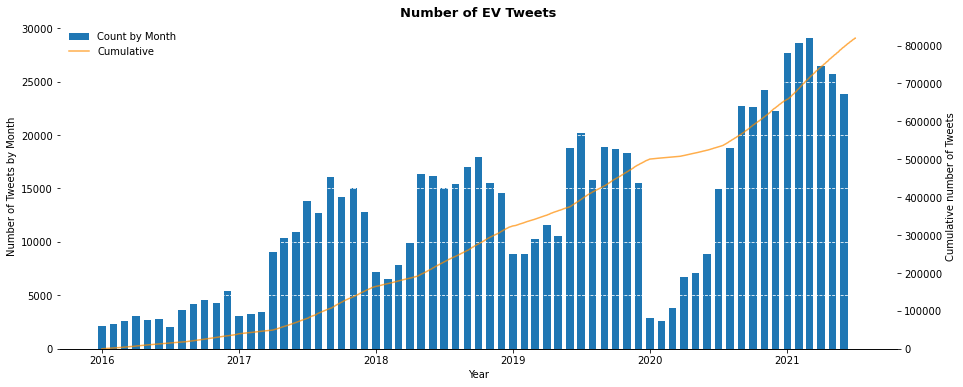

In [12]:
fig,ax1 = plt.subplots(figsize = (15,6))

# monthly bar plot
tmp = df.loc[df['brand'] == 'ev', ['date', 'tweet']].set_index('date').resample('MS').count().reset_index()
ax1.bar(tmp['date'], tmp['tweet'], width=20, label = 'Count by Month')

# cumulative 
ax2 = ax1.twinx()
tmp_ev = df[df['brand'] == 'ev'].set_index('date').resample('D')['tweet'].count().cumsum().reset_index()
ax2.plot(tmp_ev['date'], tmp_ev['tweet'], label = 'Cumulative', c = 'darkorange', alpha = 0.7)

#set axis labels
ax1.set_ylabel('Number of Tweets by Month')
ax2.set_ylabel('Cumulative number of Tweets')
ax2.set_ylim(ymin=0)
ax1.set_xlabel('Year', fontsize = 10)

#remove spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

# get legend
bars, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(bars + lines2, labels + labels2, loc=0, frameon = False)

# gridline
ax1.grid(axis = 'y', ls = '--', c = 'white')

plt.title('Number of EV Tweets', fontweight = 'bold', size = 13)
plt.savefig('EV_stats.png')


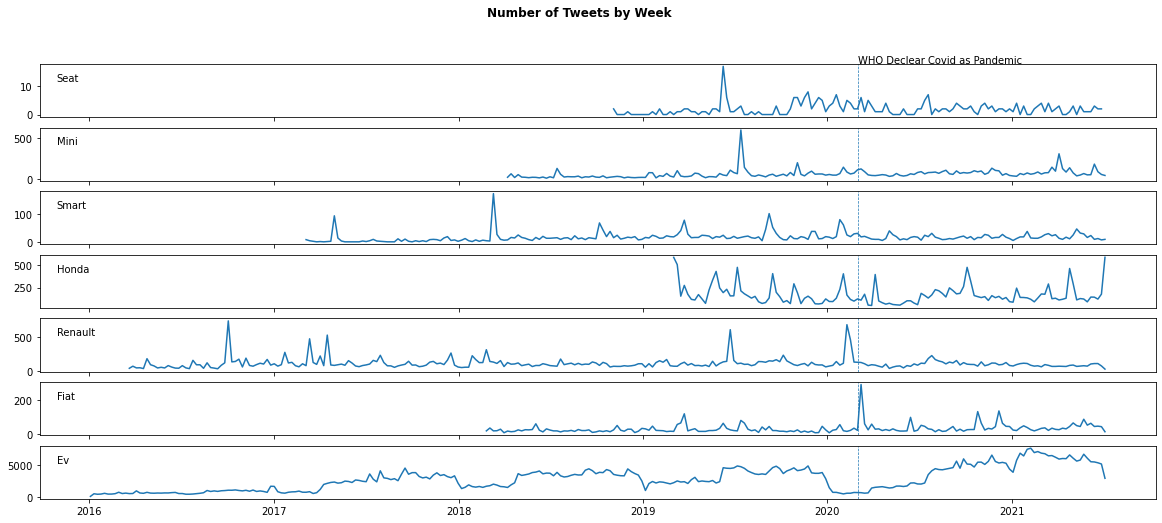

In [11]:
fig,axs = plt.subplots(7, figsize = (20,8), sharex = True)

for i, brand in enumerate(df['brand'].unique()):
    tmp1 = df[df['brand'] == brand]
    tmp1_df = pd.DataFrame(tmp1.set_index('date').resample('W')['tweet'].count().reset_index())
    brand_ = str(brand).capitalize()
    axs[i].plot(tmp1_df['date'], tmp1_df['tweet'], label = brand_)
    axs[i].legend(loc = 'upper left', handlelength=0, frameon = False)
    axs[i].axvline(dt.datetime(2020,3,1), ls = '--', lw = 0.7)

plt.suptitle('Number of Tweets by Week', fontweight = 'bold')
axs[0].annotate('WHO Declear Covid as Pandemic', xy = (dt.datetime(2020,3,1), 18), annotation_clip=False)

plt.savefig('tweetbyweek.png')